In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imported required modules 

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
import csv

*reading data from original file from CDC.gov*

In [ ]:
#diseases_data=pd.read_csv("/content/drive/MyDrive/Springboard/Conditions_Contributing_to_COVID-19_Deaths.csv")
diseases_data=pd.read_csv("/content/drive/MyDrive/Springboard/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
diseases_data.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-06,OH,39.0,BELMONT,39013.0,NaN,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,NaN,Yes
1,2020-09,OH,39.0,GALLIA,39053.0,0 - 17 years,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
2,2020-11,PA,42.0,ELK,42047.0,18 to 49 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Unknown,Unknown,NaN
3,2021-02,AL,1.0,TALLAPOOSA,1123.0,Missing,Female,Missing,Missing,NaN,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,NaN
4,2020-12,IA,19.0,CARROLL,19027.0,0 - 17 years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,Missing,Missing,Missing,NaN


In [ ]:
diseases_data.to_csv("/content/drive/MyDrive/Springboard/outputfilename.csv", index=False)


In [ ]:
diseases_data.columns

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

In [ ]:
diseases_data['death_yn'].unique()

array([nan, 'No', 'Unknown', 'Missing', 'Yes'], dtype=object)

In [ ]:
diseases_data['death_yn'].value_counts()

No         14559860
Missing     9495661
Unknown     2888980
Yes          287183
Name: death_yn, dtype: int64

In [ ]:
diseases_data['ethnicity'].value_counts()

Non-Hispanic/Latino    12346935
Unknown                 6056549
Hispanic/Latino         2521870
Missing                 1688368
Name: ethnicity, dtype: int64

In [ ]:
diseases_data['sex'].value_counts()

Female     14394209
Male       13119936
Unknown      195052
Missing       33911
Other            12
Name: sex, dtype: int64

In [ ]:
diseases_data['underlying_conditions_yn'].value_counts()

Yes    1820333
No       32861
Name: underlying_conditions_yn, dtype: int64

In [ ]:
diseases_data['hosp_yn'].value_counts()

Missing    12764423
No         10396240
Unknown     4139054
Yes         1353047
Name: hosp_yn, dtype: int64

In [ ]:
diseases_data['age_group'].value_counts()

18 to 49 years    15266636
50 to 64 years     5613050
65+ years          3683918
0 - 17 years       3530521
Missing             209677
Name: age_group, dtype: int64

In [ ]:
diseases_data['race'].value_counts()

White                                     12535233
Unknown                                    4344343
Black                                      2317960
Missing                                    2247886
Multiple/Other                             1283606
Asian                                       579024
American Indian/Alaska Native               191794
Native Hawaiian/Other Pacific Islander       37215
Name: race, dtype: int64

In [ ]:
diseases_data['exposure_yn'].value_counts()

Missing    25945467
Yes         1945791
Unknown      761506
Name: exposure_yn, dtype: int64

In [ ]:

diseases_data['process'].value_counts()

Missing                             27362153
Clinical evaluation                   567788
Routine surveillance                  275718
Multiple                              174072
Laboratory reported                   109851
Contact tracing of case patient        94164
Unknown                                41051
Other                                  10900
Other detection method (specify)        9097
Provider reported                       7763
Routine physical examination             200
Autopsy                                    7
Name: process, dtype: int64

Dropped columns

In [ ]:
diseases_data = diseases_data.drop(columns=['state_fips_code', 'res_county','county_fips_code','ethnicity','case_positive_specimen_interval','case_onset_interval'])

Replacing Missing with Unknown in all columns

In [ ]:
diseases_data['exposure_yn'] = diseases_data['exposure_yn'].replace(['Missing'],'Unknown')
diseases_data['process'] = diseases_data['process'].replace(['Missing'],'Unknown')
diseases_data['process'] = diseases_data['process'].replace(['Other detection method (specify)'],'Other')
diseases_data['symptom_status'] = diseases_data['symptom_status'].replace(['Missing'],'Unknown')
diseases_data['icu_yn'] = diseases_data['icu_yn'].replace(['Missing'],'Unknown')

In [ ]:
diseases_data['process'].value_counts()

Unknown                            27403204
Clinical evaluation                  567788
Routine surveillance                 275718
Multiple                             174072
Laboratory reported                  109851
Contact tracing of case patient       94164
Other                                 19997
Provider reported                      7763
Routine physical examination            200
Autopsy                                   7
Name: process, dtype: int64

In [ ]:
diseases_data['exposure_yn'].value_counts()

Unknown    26706973
Yes         1945791
Name: exposure_yn, dtype: int64

In [ ]:
existing_deaths=diseases_data.loc[(diseases_data['death_yn'].isin(['Yes','No'])) & (diseases_data['age_group'].isin(['18 to 49 years','50 to 64 years','65+ years','0 - 17 years'])) & diseases_data['sex'].isin(['Female','Male']) & 
                                  diseases_data['race'].isin(['White','Black','Asian','American Indian/Alaska Native','Native Hawaiian/Other Pacific Islander','Multiple/Other','Unknown'])
                                  & (~diseases_data['process'].isin(['Other'])) & (~diseases_data['underlying_conditions_yn'].isnull())]
existing_deaths.head()

,case_month,res_state,age_group,sex,race,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
35,2020-09,NC,18 to 49 years,Female,Black,Unknown,Yes,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Yes
140,2020-07,KS,18 to 49 years,Male,White,Laboratory reported,Unknown,Laboratory-confirmed case,Symptomatic,Unknown,No,No,Yes
202,2020-08,NC,50 to 64 years,Female,Black,Unknown,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Yes
231,2020-08,IA,18 to 49 years,Male,White,Clinical evaluation,Unknown,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
327,2020-12,NC,0 - 17 years,Female,White,Unknown,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Yes


In [ ]:
existing_deaths.shape

(973146, 13)

In [ ]:
diseases_data.shape
#drop ethinicity,case spec interval,case onset interval, fips code removal in both sate,res_county
#Other and other combine
#missing and unknown make it unknown

#groupby state, month ,age group,sex,race, current status,hosp_yn,systmptom status,underlying_conditions_yn -----death_yn
#count 


(28652764, 13)

In [ ]:
#df_melt = existing_deaths.melt(id_vars = ['res_state'], value_vars=['Estimate!!SEX AND AGE!!Under 5 years','Estimate!!SEX AND AGE!!5 to 9 years','Estimate!!SEX AND AGE!!10 to 14 years','Estimate!!SEX AND AGE!!15 to 19 years','Estimate!!SEX AND AGE!!20 to 24 years','Estimate!!SEX AND AGE!!25 to 34 years','Estimate!!SEX AND AGE!!35 to 44 years','Estimate!!SEX AND AGE!!45 to 54 years','Estimate!!SEX AND AGE!!55 to 59 years','Estimate!!SEX AND AGE!!60 to 64 years','Estimate!!SEX AND AGE!!65 to 74 years','Estimate!!SEX AND AGE!!75 to 84 years','Estimate!!SEX AND AGE!!85 years and over'], value_name='Cancer_Deaths')
#age_df_melt.rename(columns = {'year' : 'year',
                         # 'variable' : 'age_group'}, inplace = True)
#age_df_deaths = age_df_melt.groupby(['year','age_group']).sum('Cancer_Deaths').reset_index()
df = existing_deaths.groupby(['case_month','res_state','sex','race','process','exposure_yn','symptom_status','hosp_yn','current_status','age_group','underlying_conditions_yn','icu_yn']).agg(['count'])
df.head(40)

death_yn
                                                                                                                                                                                    count
case_month res_state sex    race    process                         exposure_yn symptom_status hosp_yn current_status            age_group      underlying_conditions_yn icu_yn          
2020-01    NJ        Female White   Unknown                         Unknown     Unknown        Yes     Laboratory-confirmed case 18 to 49 years Yes                      Unknown        6
                     Male   White   Unknown                         Unknown     Symptomatic    Yes     Laboratory-confirmed case 65+ years      Yes                      Unknown        1
                                                                                Unknown        Yes     Laboratory-confirmed case 65+ years      Yes                      Unknown        2
2020-02    NY        Male   Unknown Unknown                         Unknown     Symptomatic    Yes     Laboratory-confirmed case 50 to 64 years Yes                      No             1
                                                                                                                                                                         Unknown        1
           WA        Female White   Unknown                         Unknown     Symptomatic    No      Laboratory-confirmed case 65+ years      Yes                      Unknown        2
                                                                                               Yes     Laboratory-confirmed case 65+ years      Yes                      No             4
                                                                                                                                                                         Unknown        1
                                                                                                                                                                         Yes            7
                                                                    Yes         Symptomatic    Yes     Laboratory-confirmed case 65+ years      Yes                      Yes            1
                     Male   White   Unknown                         Unknown     Symptomatic    No      Laboratory-confirmed case 65+ years      Yes                      Unknown        2
                                                                                               Yes     Laboratory-confirmed case 65+ years      Yes                      No             2
                                                                                                                                                                         Unknown        1
                                                                                                                                                                         Yes            7
2020-03    AK        Female White   Clinical evaluation             Unknown     Symptomatic    No      Laboratory-confirmed case 18 to 49 years Yes                      Unknown        5
                                                                                               Yes     Laboratory-confirmed case 18 to 49 years Yes                      No             1
                                                                    Yes         Symptomatic    No      Laboratory-confirmed case 18 to 49 years Yes                      Unknown        3
                                    Contact tracing of case patient Yes         Symptomatic    No      Laboratory-confirmed case 18 to 49 years Yes                      Unknown        7
                                                                                               Yes     Laboratory-confirmed case 18 to 49 years Yes                      Unknown        1
                                    Multiple                        Unknown     Sympt

*State disease data*


In [ ]:
df.columns

MultiIndex([('death_yn', 'count')],
           )

In [ ]:
#df.tail(40)
month_df = df.groupby(['case_month']).sum('count').reset_index()
month_df = month_df.sort_values(by = month_df.columns[1])

month_df.head()

,case_month,death_yn
,,count
0,2020-01,9
1,2020-02,29
19,2021-08,88
17,2021-06,4841
16,2021-05,16741


In [ ]:
top_month_df = month_df.head(5)
top_month_df

,case_month,death_yn
,,count
0,2020-01,9
1,2020-02,29
19,2021-08,88
17,2021-06,4841
16,2021-05,16741


In [ ]:
last_month_df = month_df.tail(5)
last_month_df

,case_month,death_yn
,,count
3,2020-04,70241
9,2020-10,93519
12,2021-01,97190
11,2020-12,135142
10,2020-11,141353


In [ ]:
month_df.columns

MultiIndex([('case_month',      ''),
            (  'death_yn', 'count')],
           )

**Monthly COVID deaths**

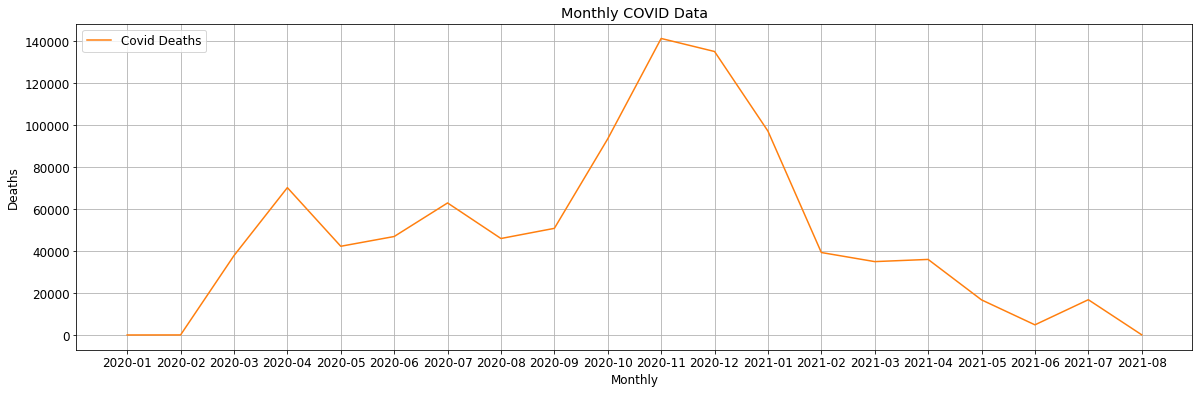

In [ ]:
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))

# Specify how our lines should look
ax.plot(month_df.case_month, month_df.death_yn, color='tab:orange', label='Covid Deaths')

# Same as above
ax.set_xlabel('Monthly')
ax.set_ylabel('Deaths')
ax.set_title('Monthly COVID Data')
ax.grid(True)
ax.legend(loc='upper left');

#ggplot(month_df, aes(x= 'case_month', y = 'death_yn')) + geom_line() 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


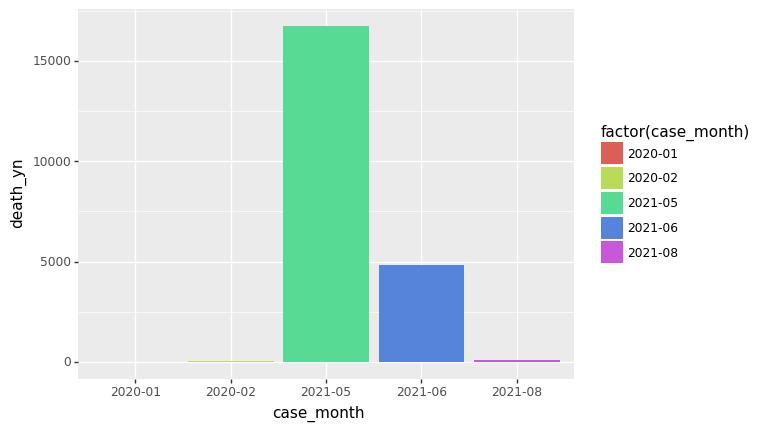

<ggplot: (8777304296861)>

In [ ]:
ggplot(top_month_df, aes(x= 'case_month', y = 'death_yn',fill = 'factor(case_month)')) + geom_bar(stat = 'identity') 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


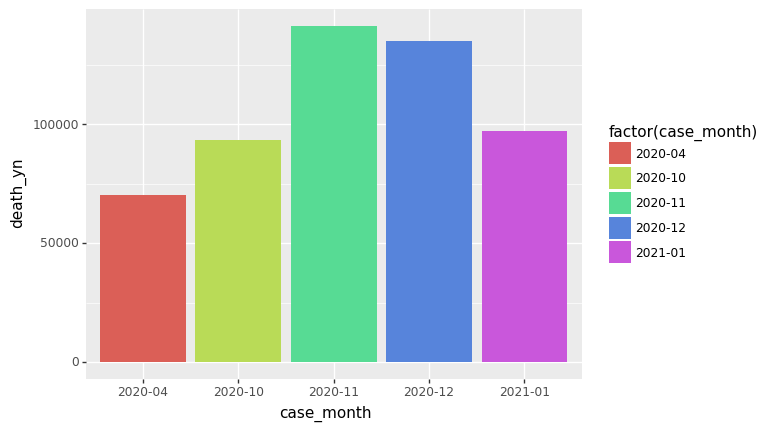

<ggplot: (8769248398973)>

In [ ]:
ggplot(last_month_df, aes(x= 'case_month', y = 'death_yn',fill = 'factor(case_month)')) + geom_bar(stat = 'identity') 

**Gender COVID Data**

In [ ]:
gender_month_df = df.groupby(['case_month','res_state','sex']).sum('count').reset_index()
gender_month_df= gender_month_df.sort_values(by=['case_month'])
gender_month_df.head()

,case_month,res_state,sex,death_yn
,,,,count
0,2020-01,NJ,Female,6
1,2020-01,NJ,Male,3
2,2020-02,NY,Male,2
3,2020-02,WA,Female,15
4,2020-02,WA,Male,12


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


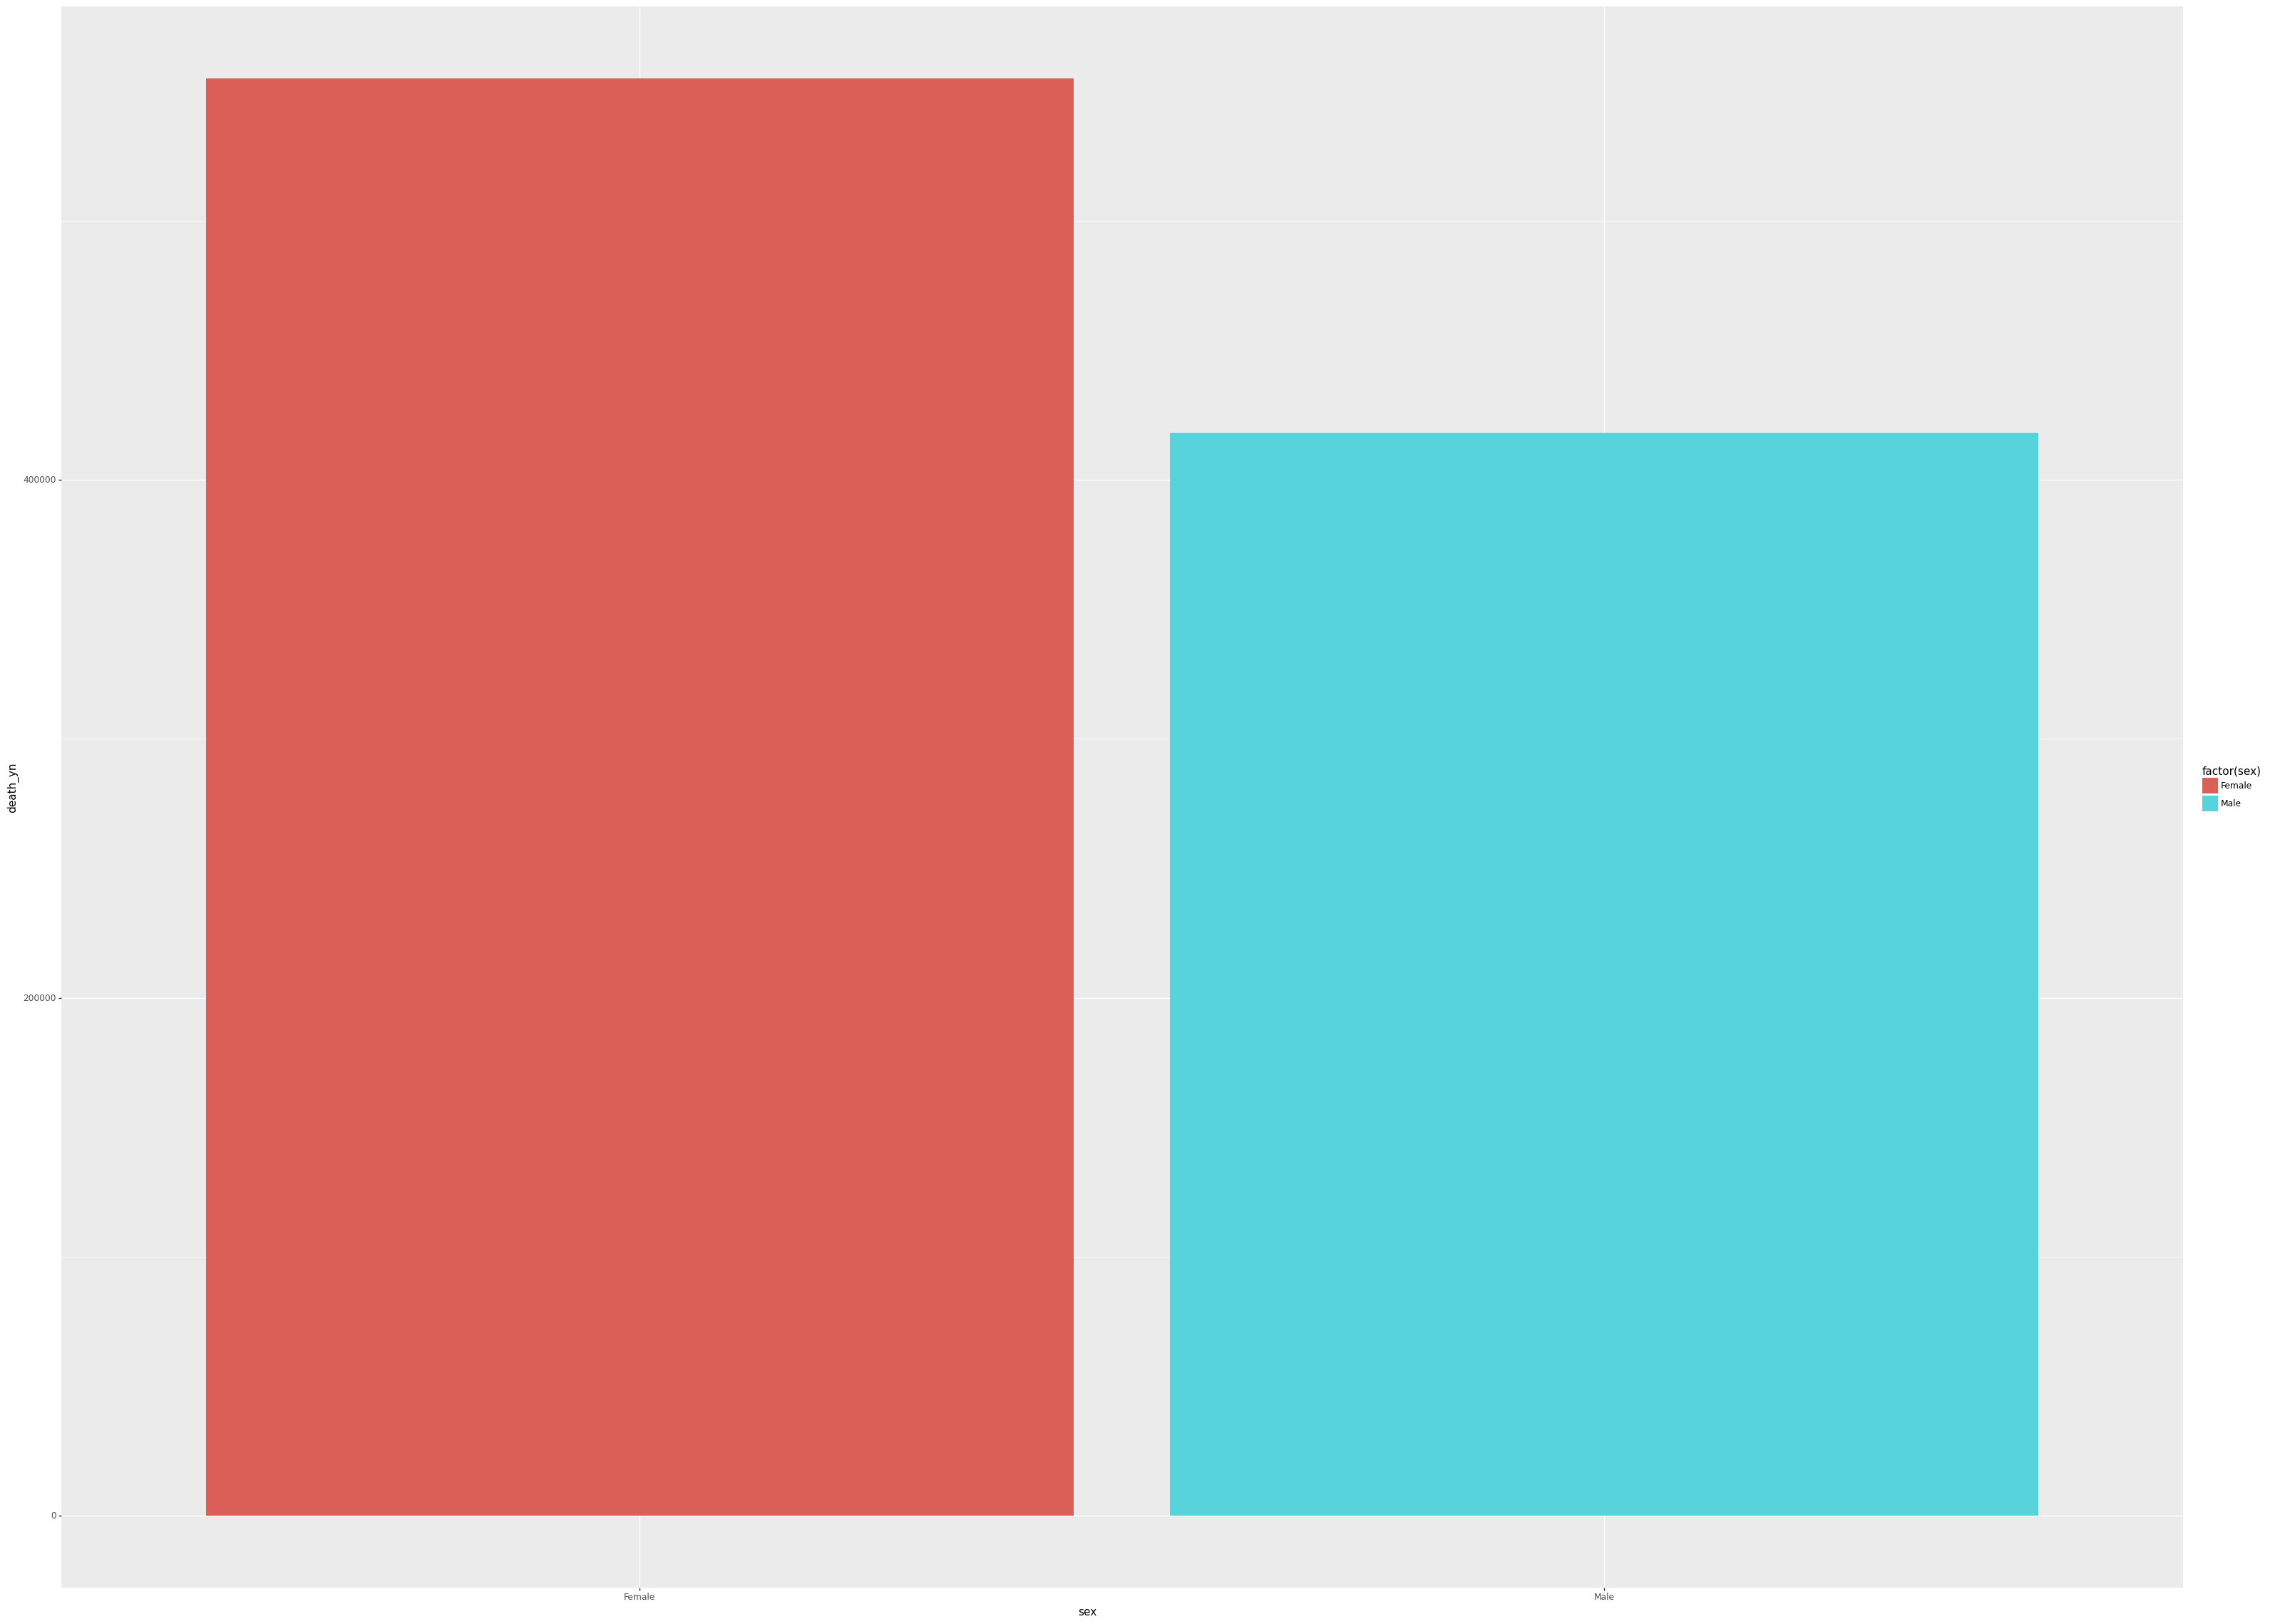

<ggplot: (8771852229405)>

In [ ]:
#deaths in gender

gender_deaths = df.groupby(['sex']).sum('count').reset_index()
ggplot(gender_deaths, aes(x= 'sex', y = 'death_yn',fill = 'factor(sex)')) + geom_bar(stat="identity") 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group

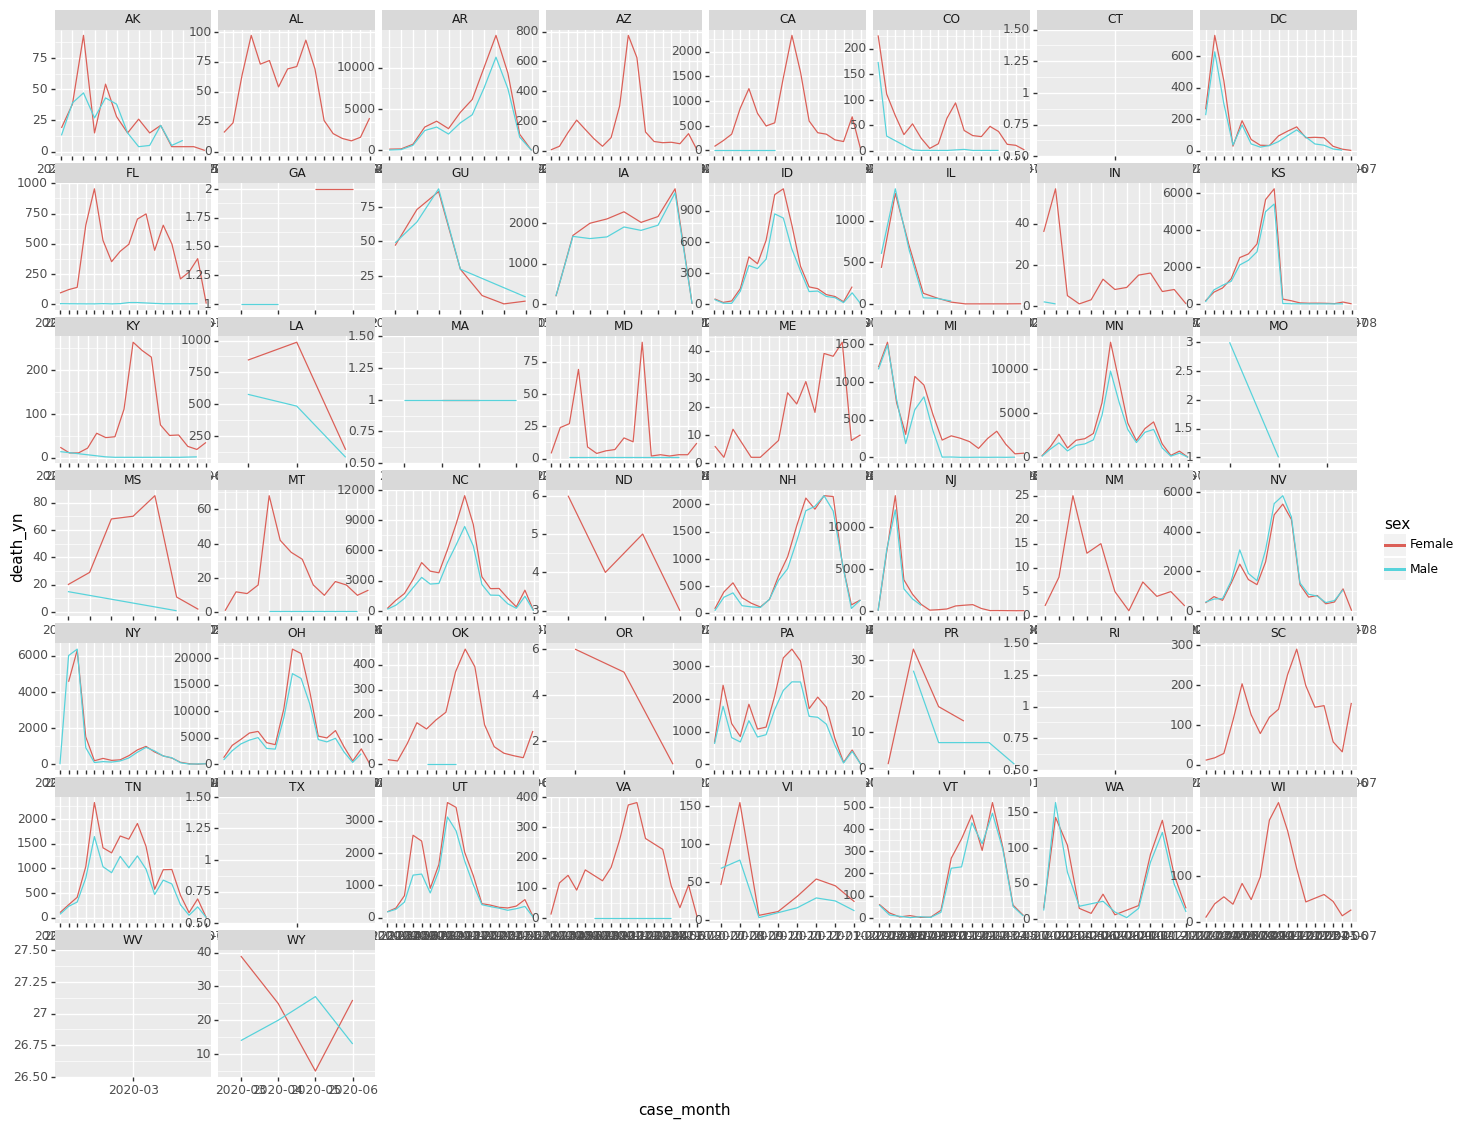

<ggplot: (8771851078905)>

In [ ]:
import plotnine as plt9
plt9.options.figure_size = (8.4*2, 6.8*2)
#ggplot(gender_month_df, aes(x = 'case_month', y = 'res_state', color = 'sex')) + geom_point() + stat_smooth()
ggplot(gender_month_df, aes(x = 'case_month', y = 'death_yn', group = 'sex',color = 'sex')) +  geom_line() + facet_wrap('res_state', scales = "free")

In [ ]:
gender_df = df.groupby(['case_month','sex']).sum('count').reset_index()
gender_df.head()

,case_month,sex,death_yn
,,,count
0,2020-01,Female,6
1,2020-01,Male,3
2,2020-02,Female,15
3,2020-02,Male,14
4,2020-03,Female,18732


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


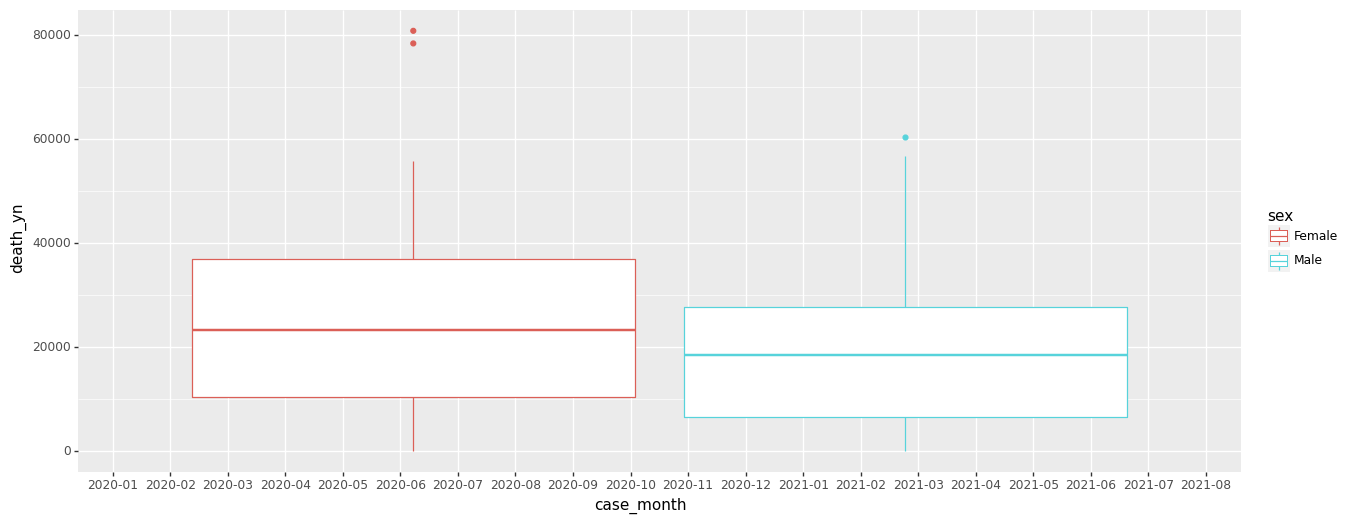

<ggplot: (8758395091573)>

In [ ]:
ggplot(gender_df, aes(x='case_month',y='death_yn',color='sex',group = 'sex')) + geom_boxplot() + theme(
    figure_size=(15, 6))



In [ ]:
#group by total covid deaths in each state in different age groups

state_age_df = df.groupby(['res_state', 'age_group']).sum('count').reset_index()
#state_age_df = state_age_df.sort_values(by=state_age_df.columns[2],ascending=False)
#state_age_df = state_age_df.unstack(level=0)
state_age_df['res_state'] = pd.Categorical(state_age_df['res_state'],categories=pd.unique(state_age_df.res_state))
state_age_df = state_age_df.reset_index(drop=True)
state_age_df.head()

,res_state,age_group,death_yn
,,,count
0,AK,0 - 17 years,15
1,AK,18 to 49 years,516
2,AK,50 to 64 years,58
3,AK,65+ years,14
4,AL,0 - 17 years,6


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


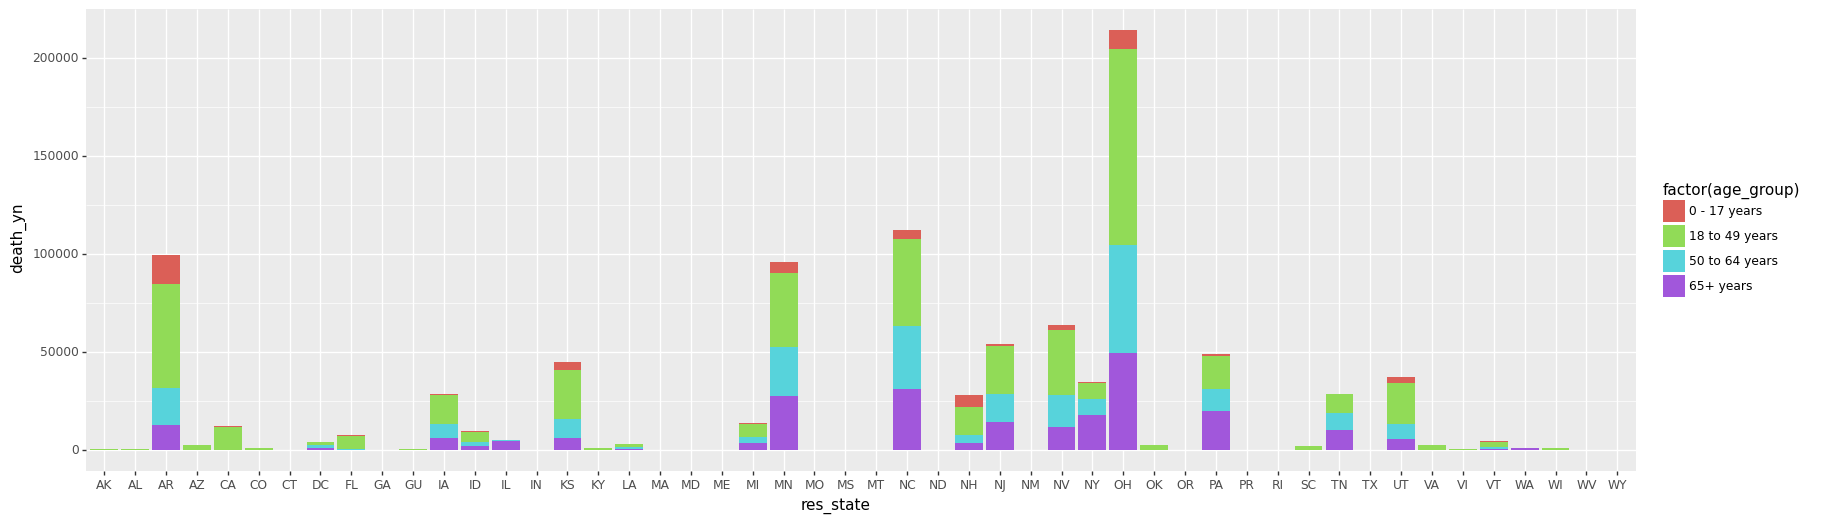

<ggplot: (8758384568845)>

In [ ]:
#lets try histogram


ggplot(state_age_df, aes(x='res_state',y='death_yn',fill='factor(age_group)')) + geom_bar(stat="identity") + theme(
    figure_size=(20, 6))


In [ ]:
age_df = df.groupby(['age_group']).sum('count').reset_index()
age_df = age_df.sort_values(by=age_df.columns[1],ascending=False)
#state_age_df = state_age_df.unstack(level=0)
age_df = age_df.reset_index(drop=True)
age_df = age_df.set_index('age_group')
#ggplot(age_df, aes(x='age_group',y='death_yn',fill='factor(age_group)')) + geom_bar(stat="identity") + coord_flip()

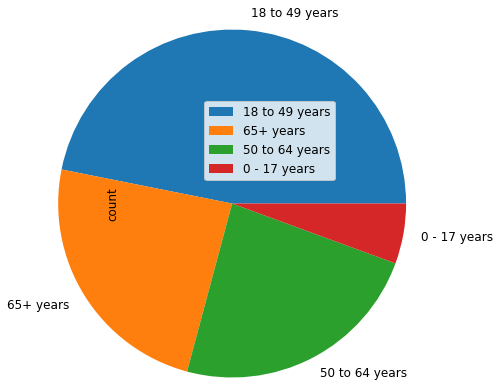

In [ ]:
plot = age_df.plot.pie(y='death_yn', radius = 2)

In [ ]:

#age_deaths = state_data.groupby(['Age Group'])['COVID-19 Deaths'].agg('sum').reset_index()
#params = ["All Ages","Not stated"]
#age_deaths = age_deaths[~age_deaths['Age Group'].isin(params)]
#age_deaths.head(10)
#Symptomatic deaths
df.columns
symptom_df = df.groupby(['case_month','symptom_status']).sum('count').reset_index()
symptom_df.symptom_status = pd.Categorical(symptom_df.symptom_status, categories=pd.unique(symptom_df.symptom_status))
symptom_df.head()

,case_month,symptom_status,death_yn
,,,count
0,2020-01,Symptomatic,1
1,2020-01,Unknown,8
2,2020-02,Symptomatic,29
3,2020-03,Asymptomatic,59
4,2020-03,Symptomatic,32868


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


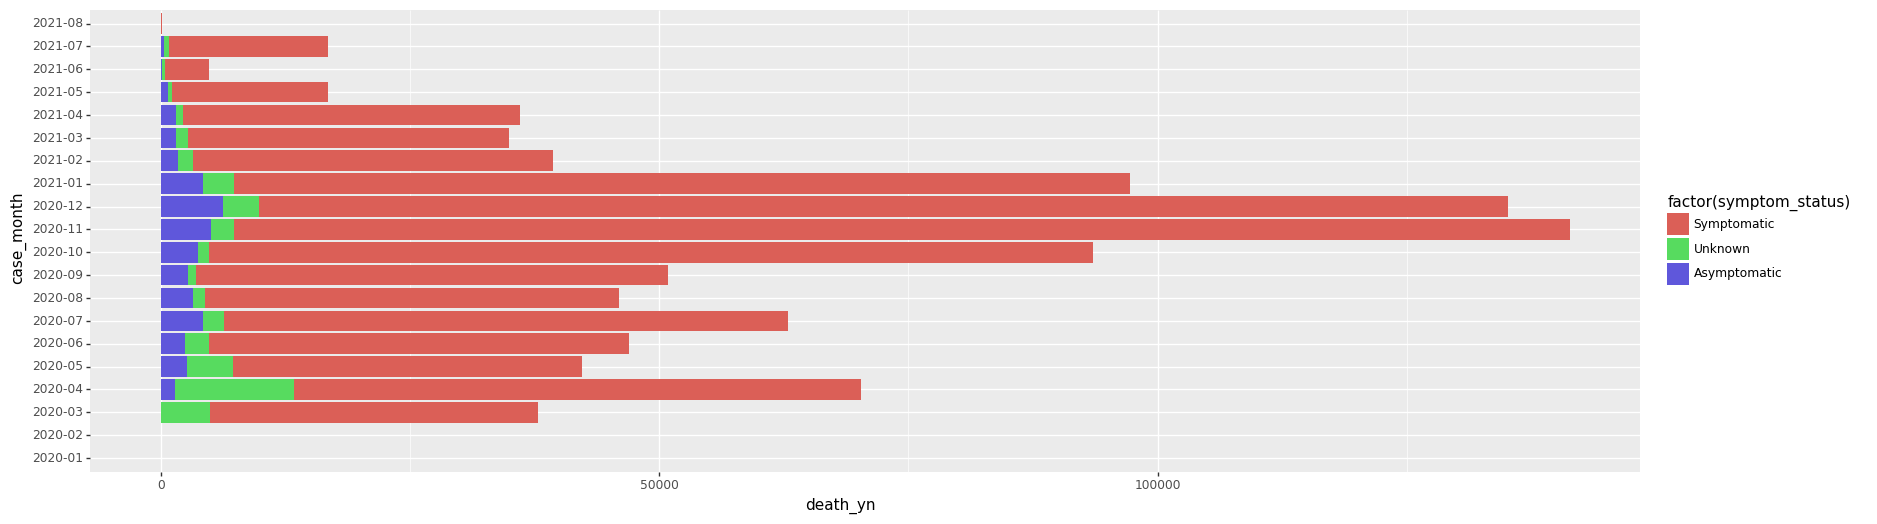

<ggplot: (8758384454601)>

In [ ]:
ggplot(symptom_df, aes(x='case_month',y='death_yn',fill='factor(symptom_status)')) + geom_bar(stat="identity") + coord_flip() + theme(
    figure_size=(20, 6))

In [ ]:
#underlying conditions for COVID deaths
cause_deaths = df.groupby(['case_month','underlying_conditions_yn']).sum('count').reset_index()
cause_deaths.head()

,case_month,underlying_conditions_yn,death_yn
,,,count
0,2020-01,Yes,9
1,2020-02,Yes,29
2,2020-03,No,2
3,2020-03,Yes,37836
4,2020-04,No,27


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


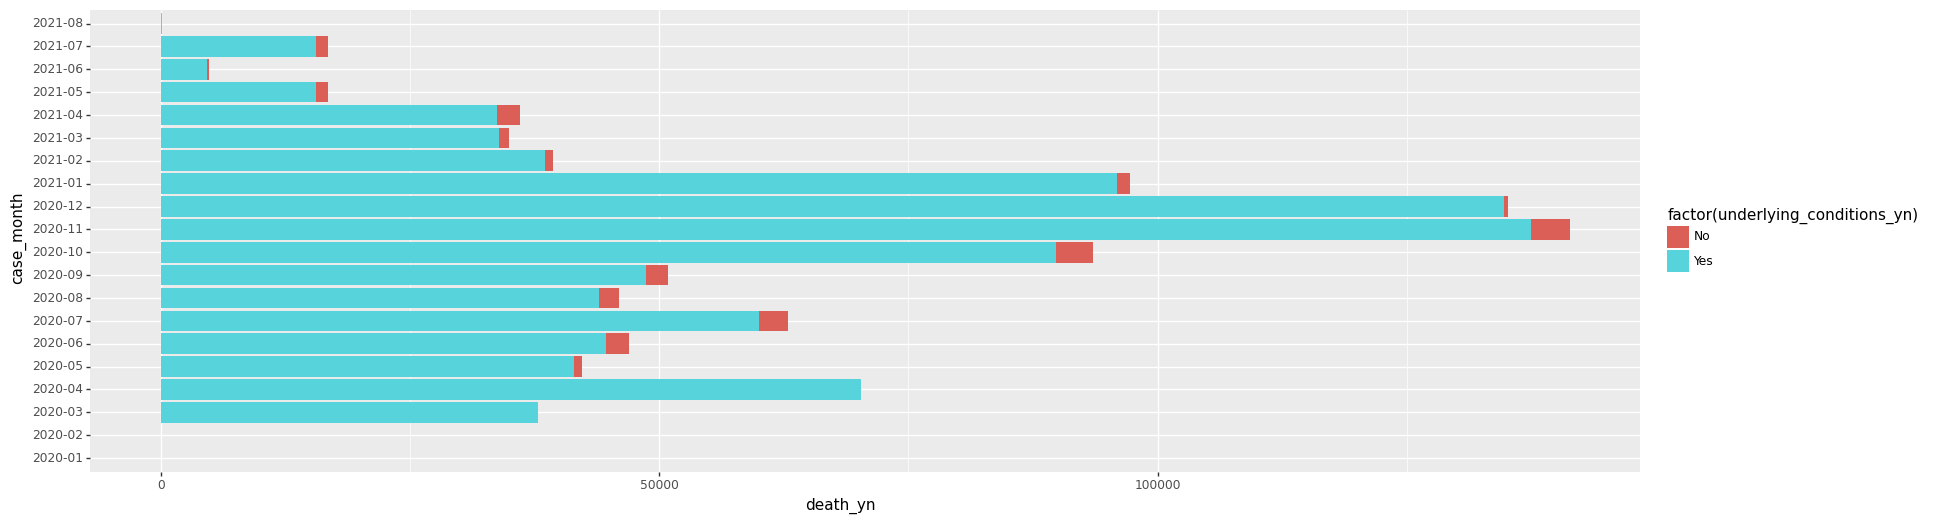

<ggplot: (8758384469529)>

In [ ]:

ggplot(cause_deaths, aes(x='case_month',y='death_yn',fill='factor(underlying_conditions_yn)')) + geom_bar(stat="identity") + coord_flip() + theme(
    figure_size=(20, 6))

In [ ]:
age_cause_deaths = df.groupby(['age_group','underlying_conditions_yn']).sum('count').reset_index()
age_cause_deaths.head()

,age_group,underlying_conditions_yn,death_yn
,,,count
0,0 - 17 years,No,4827
1,0 - 17 years,Yes,49577
2,18 to 49 years,No,17364
3,18 to 49 years,Yes,438669
4,50 to 64 years,No,3298


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


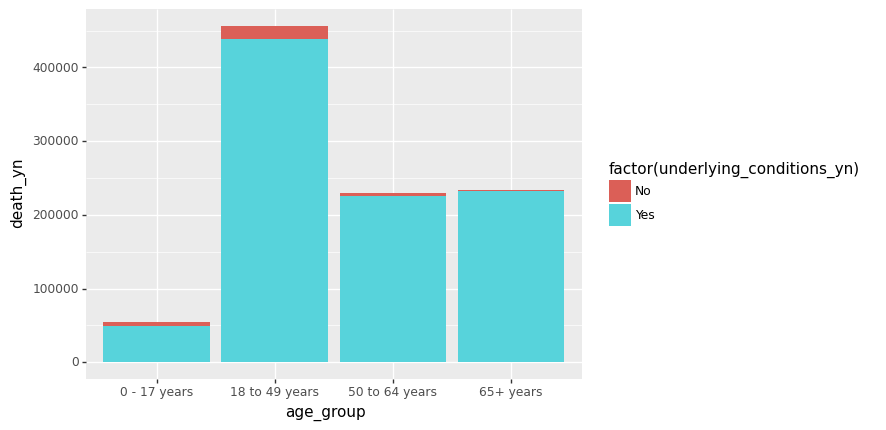

<ggplot: (8769249535885)>

In [ ]:
ggplot(age_cause_deaths, aes(x='age_group',y='death_yn',fill='factor(underlying_conditions_yn)')) + geom_bar(stat="identity") 

In [ ]:
#bar plot distribution of deaths in different Race

race_df = df.groupby(['race']).sum('count').reset_index()
race_df = race_df.sort_values(by=race_df.columns[1])
race_df['race'] = pd.Categorical(race_df.race, categories=pd.unique(race_df.race))
race_df.head()

,race,death_yn
,,count
0,American Indian/Alaska Native,3014
4,Native Hawaiian/Other Pacific Islander,3231
1,Asian,17815
3,Multiple/Other,43430
5,Unknown,56254


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


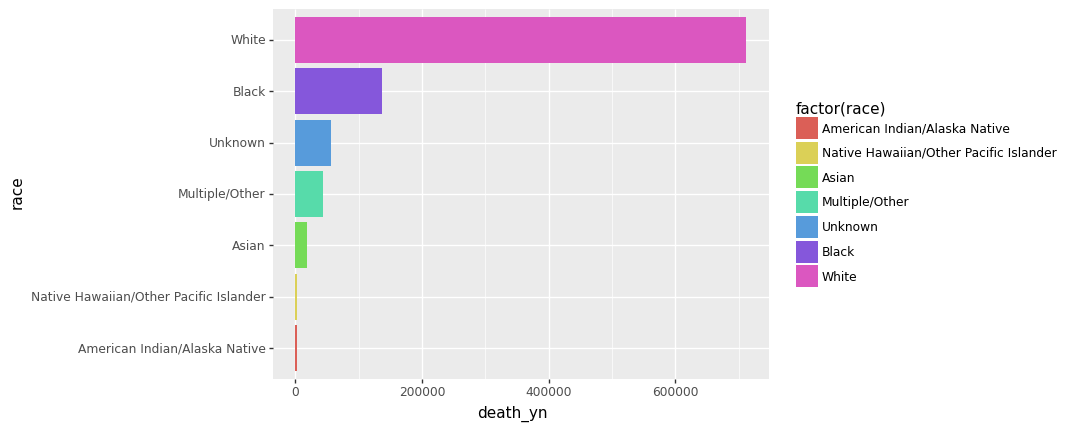

<ggplot: (8756386903781)>

In [ ]:
ggplot(race_df, aes(x= 'race', y = 'death_yn',fill= 'factor(race)')) + geom_bar(stat="identity") + coord_flip()

In [ ]:
#bar plot distribution of deaths in different state

state_df = df.groupby(['res_state']).sum('count').reset_index()
state_df = state_df.sort_values(by=race_df.columns[1],ascending=False)
state_df = state_df.sort_values(by = state_df.columns[1],ascending = False)


state_df = state_df.reset_index(drop=True)
state_df['res_state'] = pd.Categorical(state_df.res_state, categories=pd.unique(state_df.res_state))
state_df.head()

,res_state,death_yn
,,count
0,OH,214035
1,NC,112087
2,AR,99752
3,MN,96213
4,NV,63998


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


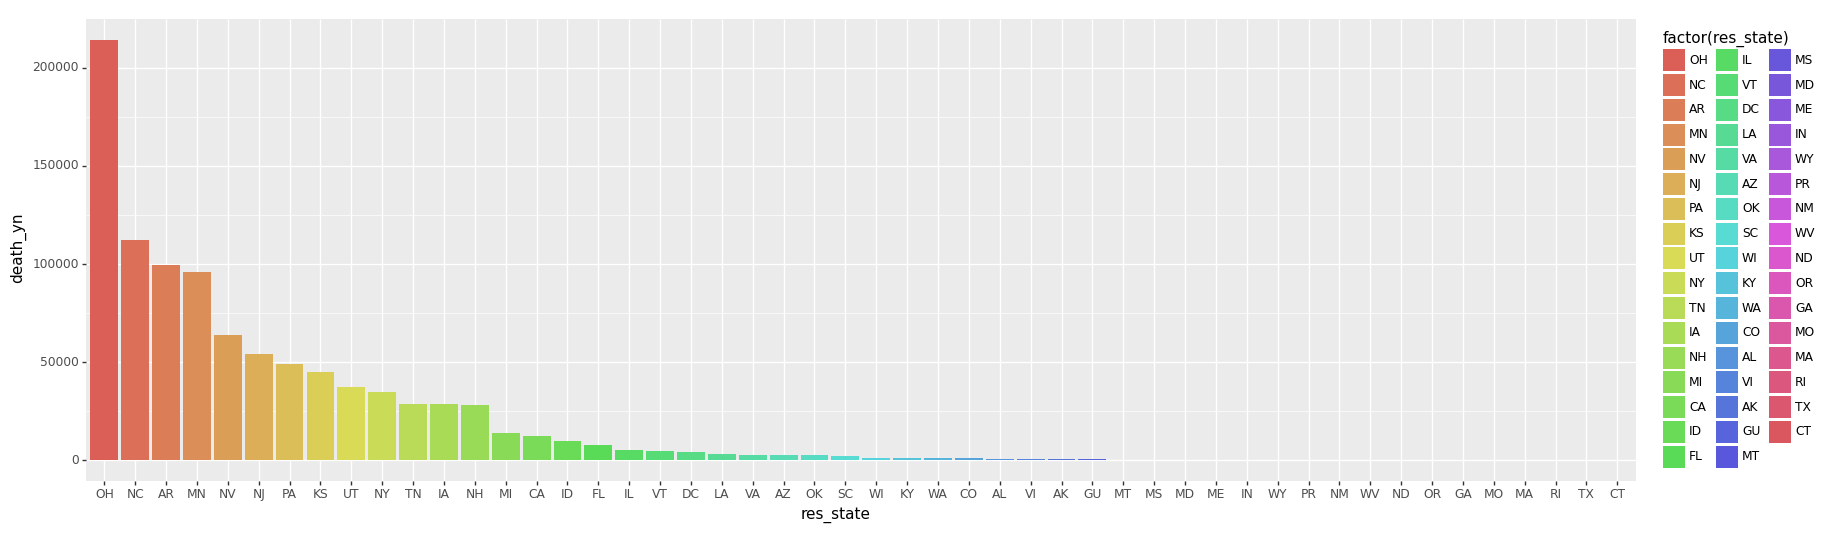

<ggplot: (8756387201441)>

In [ ]:
ggplot(state_df, aes(x= 'res_state', y = 'death_yn',fill= 'factor(res_state)')) + geom_bar(stat="identity") + theme(
    figure_size=(20, 6))

In [ ]:
sex_cause_deaths = df.groupby(['sex','underlying_conditions_yn']).sum('count').reset_index()
sex_cause_deaths.head()

,sex,underlying_conditions_yn,death_yn
,,,count
0,Female,No,14544
1,Female,Yes,540388
2,Male,No,11880
3,Male,Yes,406333


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


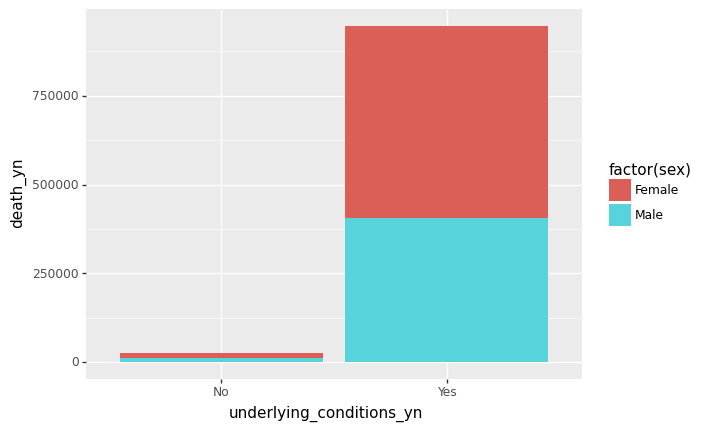

<ggplot: (8758384332541)>

In [ ]:
ggplot(sex_cause_deaths, aes(x='underlying_conditions_yn',y='death_yn',fill='factor(sex)')) + geom_bar(stat="identity") 

In [ ]:
age_sex_deaths = df.groupby(['age_group','sex']).sum('count').reset_index()
age_sex_deaths = age_sex_deaths.sort_values(by=age_sex_deaths.columns[0])
age_sex_deaths.head()

,age_group,sex,death_yn
,,,count
0,0 - 17 years,Female,26663
1,0 - 17 years,Male,27741
2,18 to 49 years,Female,279940
3,18 to 49 years,Male,176093
4,50 to 64 years,Female,121323


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


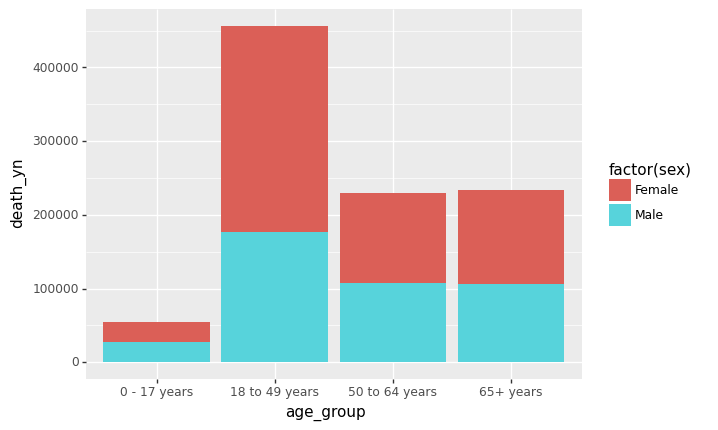

<ggplot: (8756386903749)>

In [ ]:
ggplot(age_sex_deaths, aes(x='age_group',y='death_yn',fill='factor(sex)')) + geom_bar(stat="identity") 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


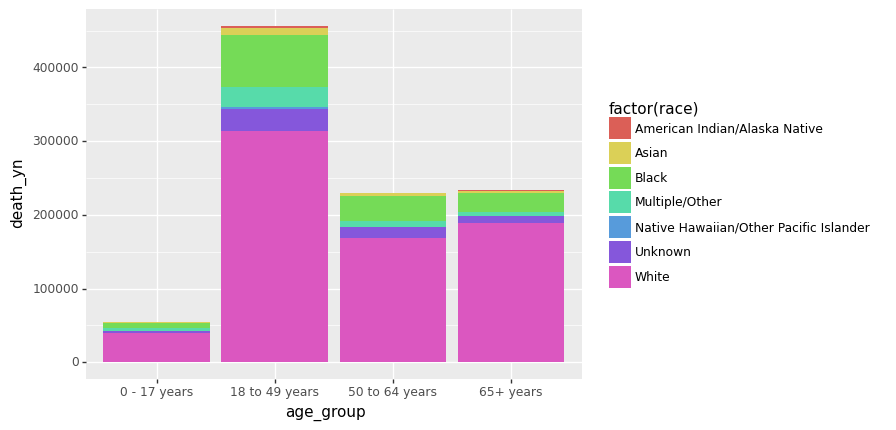

<ggplot: (8756386900325)>

In [ ]:
age_race_deaths = df.groupby(['age_group','race']).sum('count').reset_index()
ggplot(age_race_deaths, aes(x='age_group',y='death_yn',fill='factor(race)')) + geom_bar(stat="identity") 

In [ ]:
age_hosp_deaths = df.groupby(['age_group','hosp_yn']).sum('count').reset_index()
#age_hosp_deaths = age_hosp_deaths.set_index('age_group')
age_hosp_deaths.head()

,age_group,hosp_yn,death_yn
,,,count
0,0 - 17 years,Missing,5880
1,0 - 17 years,No,46717
2,0 - 17 years,Unknown,815
3,0 - 17 years,Yes,992
4,18 to 49 years,Missing,40012


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


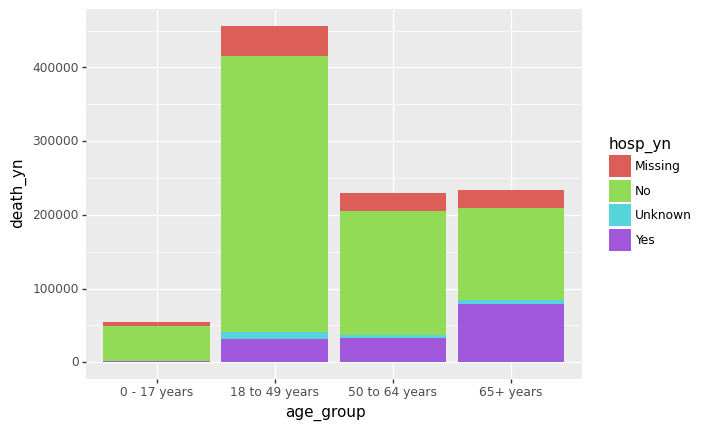

<ggplot: (8748690846245)>

In [ ]:
#ggplot(age_hosp_deaths, aes(x='age_group',y='death_yn',fill='factor(hosp_yn)')) + geom_bar(stat = 'identity')
ggplot(age_hosp_deaths, aes(x='age_group',y='death_yn',fill='hosp_yn')) + geom_bar(stat = 'identity') 
#+ coord_polar("y", start=0)
#pie

In [ ]:
#plot = age_hosp_deaths.plot.pie(y='death_yn', figsize=(5, 5))

In [ ]:
ages_df = df.groupby(['case_month','age_group']).sum('count').reset_index()
ages_df.head()

,case_month,age_group,death_yn
,,,count
0,2020-01,18 to 49 years,6
1,2020-01,65+ years,3
2,2020-02,50 to 64 years,2
3,2020-02,65+ years,27
4,2020-03,0 - 17 years,134


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


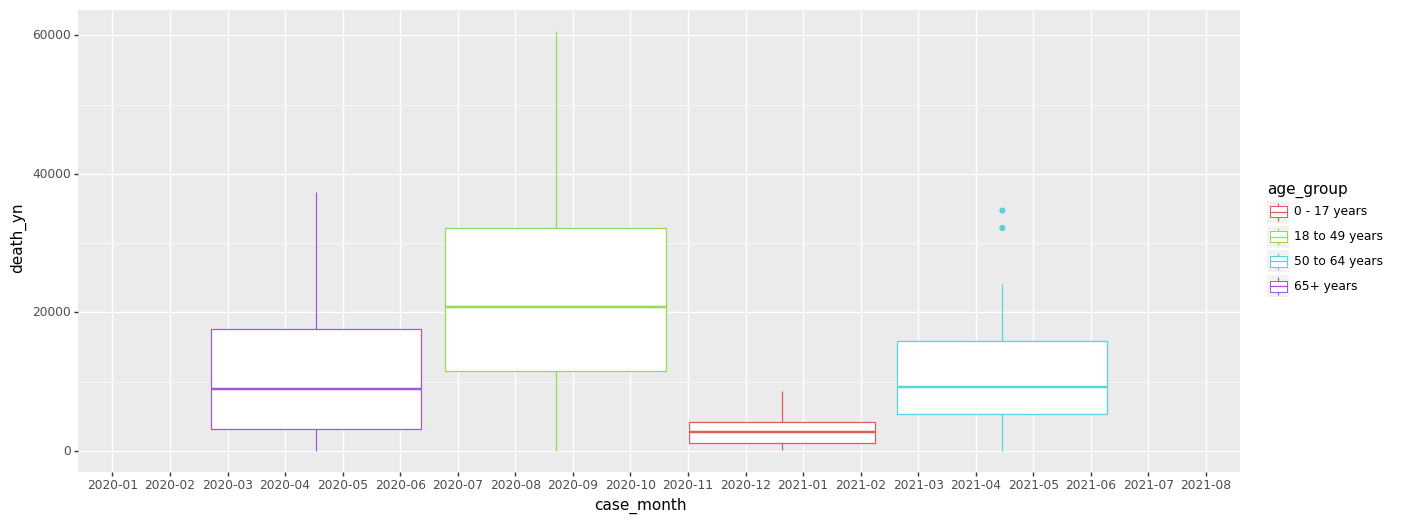

<ggplot: (8756386984501)>

In [ ]:
ggplot(ages_df, aes(x='case_month',y='death_yn',color='age_group',group = 'age_group')) + geom_boxplot() + theme(
    figure_size=(15, 6))

In [ ]:
races_df = df.groupby(['case_month','race']).sum('count').reset_index()
races_df.head()

,case_month,race,death_yn
,,,count
0,2020-01,White,9
1,2020-02,Unknown,2
2,2020-02,White,27
3,2020-03,American Indian/Alaska Native,2
4,2020-03,Asian,1248


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


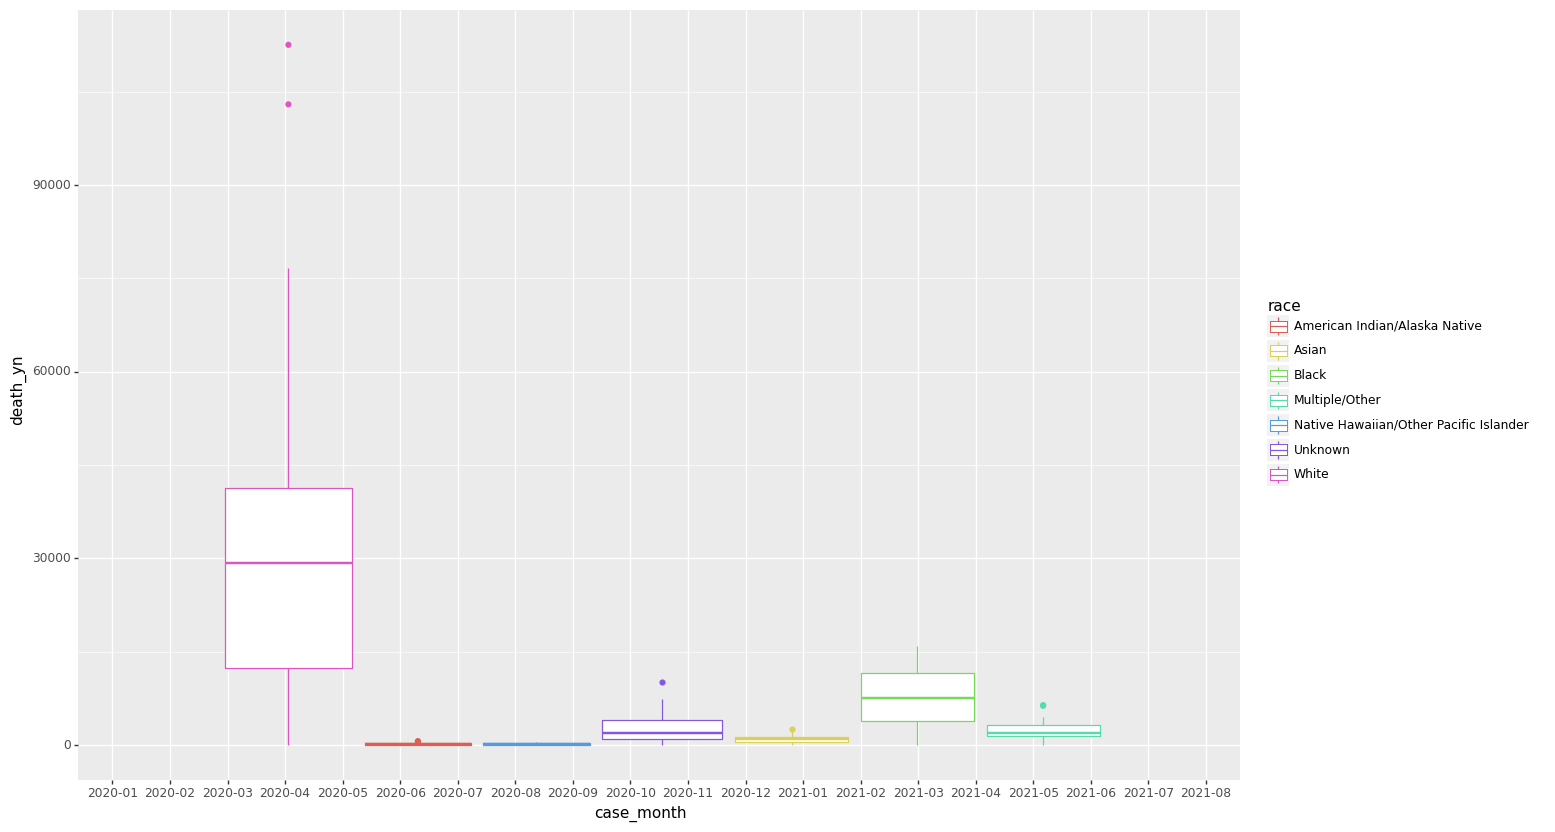

<ggplot: (8771852397849)>

In [ ]:
ggplot(races_df, aes(x='case_month',y='death_yn',color='race',group = 'race')) + geom_boxplot() + theme(
    figure_size=(15, 10))